Potrzebne importy

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

Definicja funckji która będzie później użyta

In [2]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

Wczytanie bazy danych z pliku CSV i sprawdzenie czy się poprawnie wczytała 

In [3]:
df = pd.read_csv("C:/Users/Misiek/Downloads/autos.csv/autos.csv", sep = ",", header =0, encoding="cp1252") 
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
83642,2016-03-14 11:25:21,Volkswagen_Multivan_T5_Facelift_Sondermodell_Team,privat,Angebot,28950,control,bus,2010,manuell,179,transporter,90000,10,diesel,volkswagen,nein,2016-03-14 00:00:00,0,56581,2016-04-07 01:45:29
64801,2016-03-21 22:56:21,Renault_Megane_1.6_RT_#TÜV_2/18#_Klima,privat,Angebot,900,control,kleinwagen,1997,manuell,75,megane,150000,12,benzin,renault,NaN,2016-03-21 00:00:00,0,32699,2016-04-01 10:44:41
86649,2016-03-23 16:54:19,Mazda_3_2.3_MZR_DISI_Turbo_MPS,privat,Angebot,14900,test,limousine,2009,manuell,260,3_reihe,70000,11,benzin,mazda,nein,2016-03-23 00:00:00,0,48147,2016-04-05 21:45:58
278275,2016-03-19 17:56:06,Volkswagen_Touareg_3.0_V6_TDI_SCR_Blue_Motion_...,privat,Angebot,56499,control,suv,2015,automatik,262,touareg,20000,5,diesel,volkswagen,nein,2016-03-19 00:00:00,0,66862,2016-04-07 04:45:13
53269,2016-03-15 18:51:23,Renault_R_4_L,privat,Angebot,1500,control,kleinwagen,1984,manuell,29,andere,125000,4,benzin,renault,nein,2016-03-15 00:00:00,0,67310,2016-03-25 16:18:58
276356,2016-03-31 23:50:33,Skoda_Fabia_1.2_HTP_Combi_COOL_EDITION,privat,Angebot,5900,control,kombi,2010,manuell,69,fabia,70000,10,benzin,skoda,nein,2016-03-31 00:00:00,0,72810,2016-04-04 21:47:09
123558,2016-03-07 19:42:29,Mercedes_benc_c180_sehr_gepflegt,privat,Angebot,1100,control,limousine,1995,manuell,122,c_klasse,150000,11,benzin,mercedes_benz,NaN,2016-03-07 00:00:00,0,53925,2016-03-08 11:46:20
247968,2016-03-30 19:50:24,Golf_1.9_TDI_DPF_4mot_GT_Sport,privat,Angebot,3400,test,limousine,2008,NaN,0,golf,150000,11,diesel,volkswagen,nein,2016-03-30 00:00:00,0,48151,2016-03-30 19:50:24
136313,2016-04-05 10:37:19,Ford_Focus_3Tuerer_ohne_Tuev,privat,Angebot,500,control,kleinwagen,1999,manuell,0,focus,150000,2,NaN,ford,nein,2016-04-05 00:00:00,0,8412,2016-04-07 13:16:15
299521,2016-03-06 23:49:09,Volvo__V70,privat,Angebot,700,control,kombi,1997,automatik,144,v70,150000,6,benzin,volvo,nein,2016-03-06 00:00:00,0,45239,2016-04-02 20:46:44


Sprawdzenie z jakimi danymi mamy do czynienia

In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


Usunięcie niektórych kolumn - dane w nich zawarte mogą mieć znaczenie ale w tym przypadku mogłyby bardziej namieszać niż pozytywnie wpłynąć na badanie

In [5]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)#usuwanie niepotrzebnych danych

Sprawdzenie czy odpowiednie kolumny zostały usunięte i dalsza filtracja danych. Trzeba usunąć pozycje w których wystepują skrajne wartości, bo wpłynęły by one negatywnie faktyczne relacje między parametrami.
    

In [6]:
df.sample(10)# sprawdzenie czy sie usunelo
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

Sprawdzenie gdzie występują NULLE.

In [7]:
dedups.isnull().sum()

name                       0
price                      0
vehicleType            10818
yearOfRegistration         0
gearbox                 5260
powerPS                    0
model                  11347
kilometer                  0
monthOfRegistration        0
fuelType               15400
brand                      0
notRepairedDamage      42124
dtype: int64

Zastąpienie NULL-i wartościami "not-declared"

In [8]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

Sprawdzenie czy wszystkie NULL-e zniknęły

In [9]:
dedups.isnull().sum()


name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

Porównanie liczności elementów w zbiorze na podstawie różynch kryteriów

gearbox
manuell         231997
automatik        66876
not-declared      5260
Name: gearbox, dtype: int64


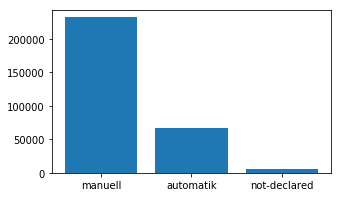

model
golf            24846
andere          21733
3er             17704
not-declared    11347
polo            10477
Name: model, dtype: int64


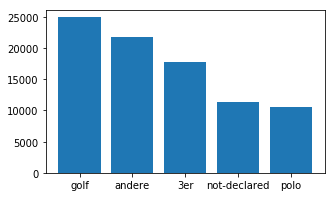

brand
volkswagen       64853
bmw              34441
opel             31757
mercedes_benz    29562
audi             27984
Name: brand, dtype: int64


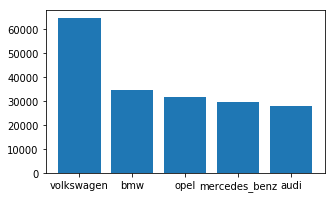

vehicleType
limousine     84843
kleinwagen    68415
kombi         59863
bus           26986
cabrio        20921
Name: vehicleType, dtype: int64


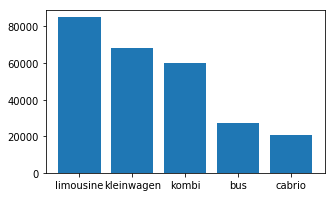

fuelType
benzin          189919
diesel           93299
not-declared     15400
lpg               4646
cng                474
Name: fuelType, dtype: int64


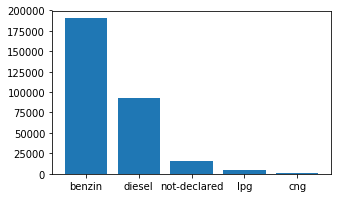

notRepairedDamage
nein            233684
not-declared     42124
ja               28325
Name: notRepairedDamage, dtype: int64


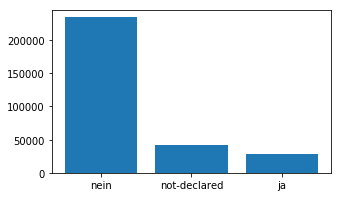

In [10]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

Wykres zależności ceny pojazdu od długości nazwy. Pozornie ilość liter w tytule oferty nie ma znaczenia na cenę, jednak wyraźnie widać, że jeśli chcemy drogo sprzedać samochód to tytuł oferty powinien się zawierać między 15 a 35 liter.

C:\Users\Misiek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


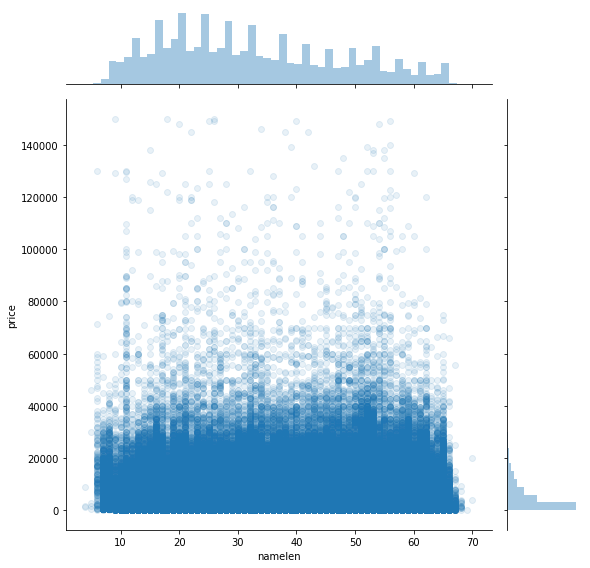

In [11]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
                   alpha=0.1, 
                    height=8)

Konwersja z parametrów "słownych" takich jak manualna, autoamtyczna na liczbowe

In [12]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]

Tabela i wykres zależności pomiędzy cechami

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,name_feat,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385264,0.573037,-0.444440,0.044782,0.186254,-0.101467,-0.297746,-0.002440,-0.012514,-0.105694,0.055978,-0.010906
yearOfRegistration,0.385264,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.016603,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958
powerPS,0.573037,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.278687,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243
kilometer,-0.444440,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,-0.025035,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183
monthOfRegistration,0.044782,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.007326,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369
namelen,0.186254,0.158798,0.106243,-0.105892,0.044338,1.000000,0.101474,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672
name_feat,-0.101467,-0.016603,-0.278687,-0.025035,-0.007326,0.101474,1.000000,0.113288,-0.001520,0.453217,0.850018,-0.025088,-0.114425
gearbox_feat,-0.297746,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,0.113288,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224
notRepairedDamage_feat,-0.002440,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,-0.001520,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220
model_feat,-0.012514,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.453217,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196


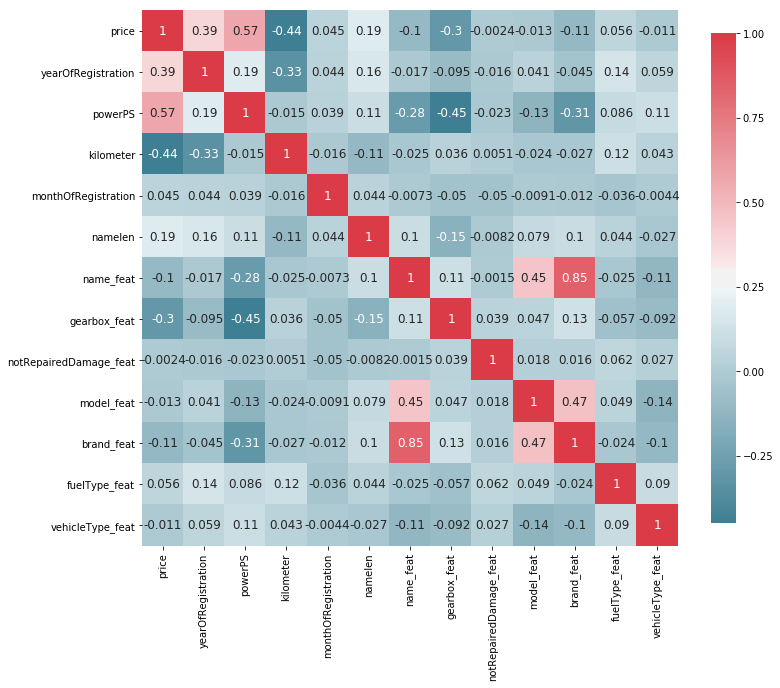

In [13]:
plot_correlation_map(labeled)
labeled.corr()

Wylistowane zależności - im większa liczba tym większy wpływ na cenę

In [14]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.573037
kilometer                 0.444440
yearOfRegistration        0.385264
gearbox_feat              0.297746
namelen                   0.186254
brand_feat                0.105694
name_feat                 0.101467
fuelType_feat             0.055978
monthOfRegistration       0.044782
model_feat                0.012514
vehicleType_feat          0.010906
notRepairedDamage_feat    0.002440
Name: price, dtype: float64